# Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation
**Author**

Zhimin Xiong 9067935

**Introduction**

This practical lab is to build and evaluate a model that can best predict the risk of diabetes progression. The models that will be looked into are Univariate polynomial regression models, Multivariate Polynomial models, Decision Trees and kNNs. The dataset used is the Scikit-Learn Diabetes dataset. [Dataset Link](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

**Imports**

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1
### 1. Get the Data

In [201]:
from sklearn.datasets import load_diabetes
# Load the dataset
diabetes = load_diabetes()

# Convert to DataFrame for easier exploration
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target column (disease progression)
df['target'] = diabetes.target

# Display the first few rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 2. Frame the Problem.

To build and evaluate a model that can best predict the risk of diabetes progression. Independent variables include age, sex, body mass index, average blood pressure, and six blood serum measurements. The dependent variable is the quantitative measure of disease progression one year after baseline.

### 3. Exploratory Data Analysis (EDA)

In [202]:
# meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [203]:
# statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


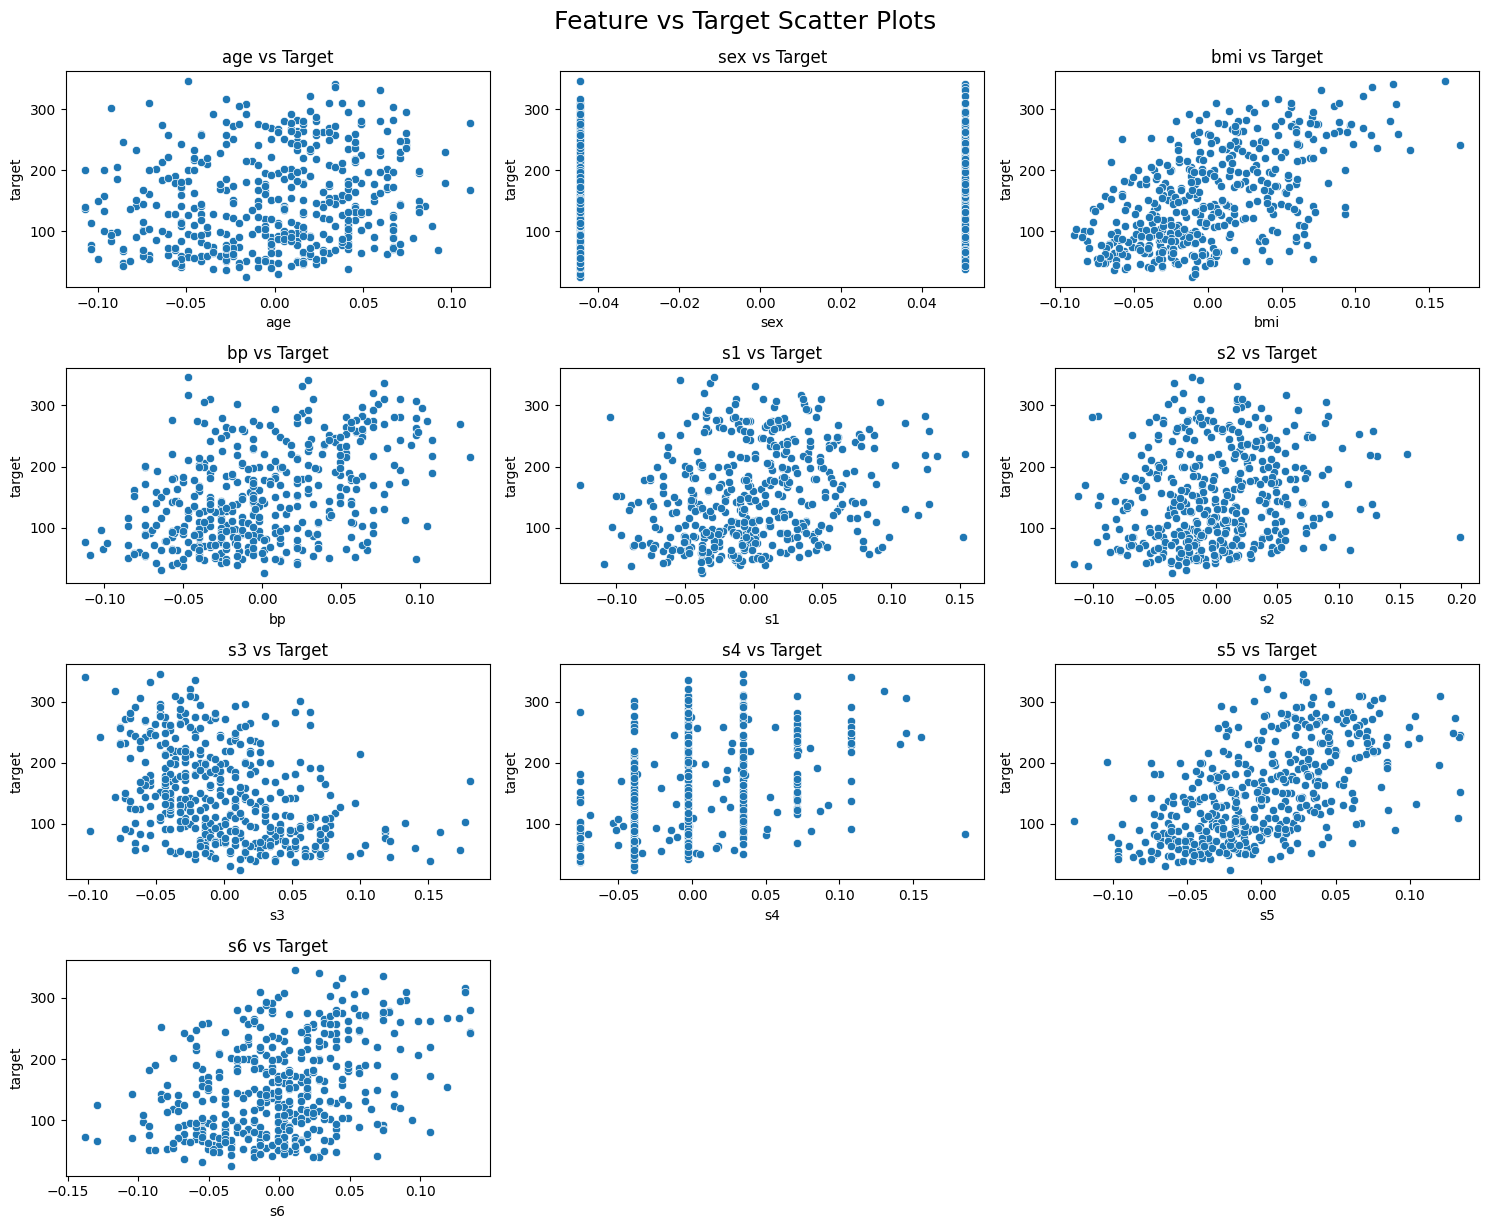

In [204]:
# scatter plots
# Plot scatter plots of each feature against the target
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, features in enumerate(diabetes.feature_names):
    sns.scatterplot(data=df, x=features, y='target', ax=axes[i])
    axes[i].set_title(f'{features} vs Target')

# Hide unused axes
for j in range(len(diabetes.feature_names), len(axes)):
    fig.delaxes(axes[j])  # or: axes[j].set_visible(False)
    
plt.tight_layout()
plt.suptitle('Feature vs Target Scatter Plots', fontsize=18, y=1.02)
plt.show()


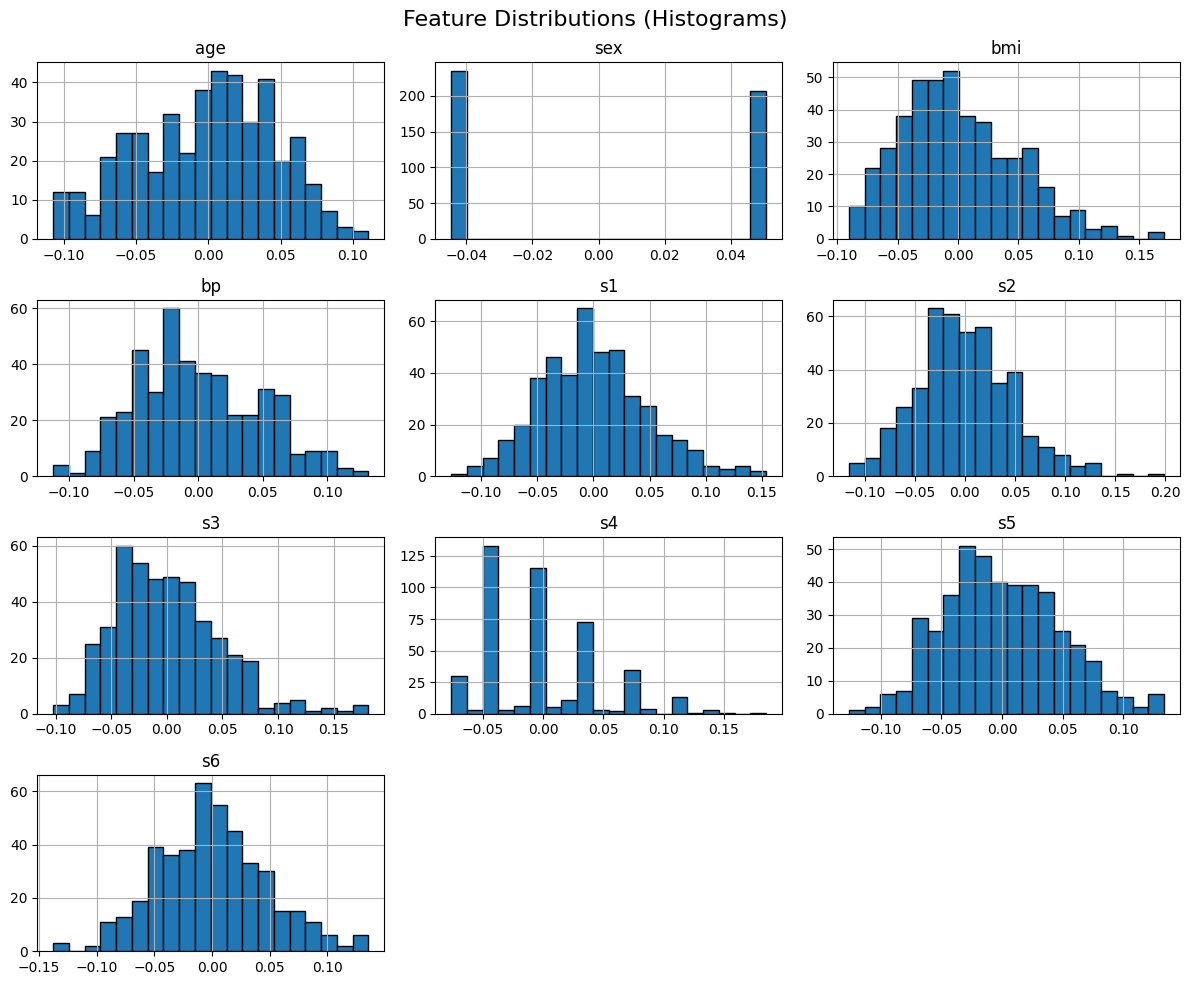

In [205]:
# histogram
# Plot histograms for each feature
df[diabetes.feature_names].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions (Histograms)', fontsize=16)
plt.tight_layout()
plt.show()

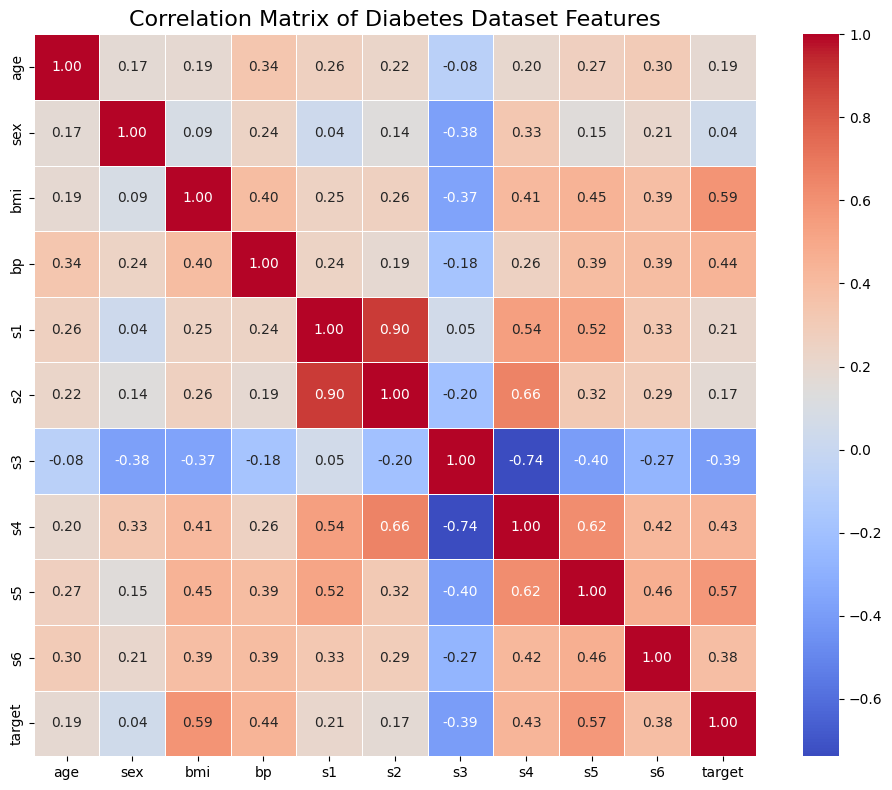

In [206]:
# correlation matrix
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Matrix of Diabetes Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

**My insights** 

* the dataset is already been preprocessed and clean. no missing data and data is transformed properly
* there is no obvious correlation between each feature and the targe (disease progression) according to the scatter plot
* all features except sex and s4 have normalized distribution according to the histogram
* according to the cross matrixCorrelation Matrix, s1 and s2 has a strong correlation

### 4. Clean the data

In [207]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print(f"dupliated rows: {df.duplicated().sum()}")

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
dupliated rows: 0


There is no need to clean the data because:
* no missing data
* all data is numeric with type float
* feature values is scaled properly
* no duplicate rows

### 5. Split the dataset 

In [208]:
from sklearn.model_selection import train_test_split
# A class to split the dataset to a train (75%) and validation set (10%), and test set (15%)
class DataSplitter:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.test_size = 0.15
        self.val_size = 0.10
        self.random_state = 42

        self.X_train = None
        self.X_val = None
        self.X_test = None
        self.y_train = None
        self.y_val = None
        self.y_test = None

    def split(self):
        # Step 1: Split off the test set
        X_temp, self.X_test, y_temp, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state)

        # Step 2: Calculate validation size relative to the remaining data
        relative_val_size = self.val_size / (1 - self.test_size)

        # Split remaining into train and validation
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            X_temp, y_temp, test_size=relative_val_size, random_state=self.random_state)

        return self.X_train, self.X_val, self.X_test, self.y_train, self.y_val, self.y_test

    def print_sizes(self):
        print(f"Train size: {self.X_train.shape[0]}")
        print(f"Validation size: {self.X_val.shape[0]}")
        print(f"Test size: {self.X_test.shape[0]}")

splitter = DataSplitter(df[diabetes.feature_names], df.target)
X_train, X_val, X_test, y_train, y_val, y_test = splitter.split()
splitter.print_sizes()

Train size: 330
Validation size: 45
Test size: 67


## Part 2

### 6. Univariate polynomial regression models

In [505]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# A class to perform and visualize polynomial regression
class UnivariatePolynomialRegressor:
    def __init__(self, X, y, feature='bmi', max_degree=5):
        self.feature = feature
        self.X = X[[feature]]  # Ensure it's a DataFrame with the selected feature
        self.y = y
        self.max_degree = max_degree
        self.models = []

        # Generate a smooth range of x values for plotting
        self.x_range = np.linspace(self.X[feature].min(), self.X[feature].max(), 500).reshape(-1, 1)

    def fit_and_plot(self):
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        axes = axes.flatten()

        for degree in range(self.max_degree + 1):
            # Create polynomial features
            poly = PolynomialFeatures(degree)
            X_poly = poly.fit_transform(self.X)
            x_range_df = pd.DataFrame(self.x_range, columns=[self.feature])
            x_range_poly = poly.transform(x_range_df)

            # Train the model
            model = LinearRegression()
            model.fit(X_poly, self.y)
            self.models.append((f"model_deg_{degree}", model, poly))

            # Predict for plotting
            y_pred = model.predict(x_range_poly)

            # Plot
            axes[degree].scatter(self.X, self.y, alpha=0.6, color='green', label='Data')
            axes[degree].plot(self.x_range, y_pred, color='red', label=f'Degree {degree}', linewidth=3)
            axes[degree].set_title(f'Polynomial Degree {degree}')
            axes[degree].set_xlabel(self.feature.capitalize())
            axes[degree].set_ylabel('Disease Progression')
            axes[degree].legend()
            axes[degree].grid(True)

        plt.tight_layout()
        plt.suptitle(f"Univariate Polynomial Regression: {self.feature.capitalize()} vs Disease Progression", fontsize=18, y=1.03)
        plt.show()

    def evaluate_models(self, X_val, y_val):
        results = []
        for name, model, poly in self.models:
            # Transform train and val sets
            X_train_poly = poly.transform(self.X)
            X_val_poly = poly.transform(X_val[[self.feature]])

            # Predict
            y_train_pred = model.predict(X_train_poly)
            y_val_pred = model.predict(X_val_poly)

            # Evaluate
            results.append({
                'Model': name,
                'Train R²': r2_score(self.y, y_train_pred),
                'Validation R²': r2_score(y_val, y_val_pred),
                'Train MAE': mean_absolute_error(self.y, y_train_pred),
                'Validation MAE': mean_absolute_error(y_val, y_val_pred),
                'Train MAPE': mean_absolute_percentage_error(self.y, y_train_pred),
                'Validation MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
            })

        return pd.DataFrame(results)
    
    def evaluate_model(self, degree, X_test, y_test):
        _, model_deg, poly_deg = self.models[degree]
        # Transform the BMI feature in the test set
        X_test_poly_deg = poly_deg.transform(X_test[[self.feature]]) 

        # Predict the target (disease progression) using the model
        y_pred_deg = model_deg.predict(X_test_poly_deg)

        r2 = r2_score(y_test, y_pred_deg)
        mae = mean_absolute_error(y_test, y_pred_deg)
        mape = mean_absolute_percentage_error(y_test, y_pred_deg)

        print(f"Degree {degree} Polynomial Regression on Test Set:")
        print(f"R²:   {r2:.4f}")
        print(f"MAE:  {mae:.4f}")
        print(f"MAPE: {mape:.4f}")

    def equation(self, degree):
        _, model_uni_best, poly_uni_best = self.models[degree]
        # Get the model's coefficients and intercept
        coefs = model_uni_best.coef_
        intercept = model_uni_best.intercept_

        # Get feature names from PolynomialFeatures
        feature_names = poly_uni_best.get_feature_names_out([self.feature])

        # Combine into an equation string
        terms = [f"{coef:.4f}·{name}" for coef, name in zip(coefs, feature_names)]
        equation = f"{intercept:.4f} + " + " + ".join(terms[1:])

        print("Polynomial Regression Equation (Degree 4):")
        print(f"y = {equation}")

    def predict(self, degree, bmi_value):
        _, model_uni_best, poly_uni_best = self.models[degree]
        bmi_df = pd.DataFrame({'bmi': [bmi_value]})
        bmi_poly = poly_uni_best.transform(bmi_df)

        prediction = model_uni_best.predict(bmi_poly)

        print(f"Predicted disease progression for {self.feature} {bmi_value}: {prediction[0]:.2f}")

    def parameters(self):
        # trainable parameters fitting for each of the models
        parameters = []

        for name, _, poly in self.models:
            # Get feature names from PolynomialFeatures
            feature_names = poly.get_feature_names_out([self.feature])
            parameters.append({
                'Model': name,
                'Features': feature_names
            })
        # Convert to DataFrame
        return pd.DataFrame(parameters)
    
    def get_models(self):
        return self.models

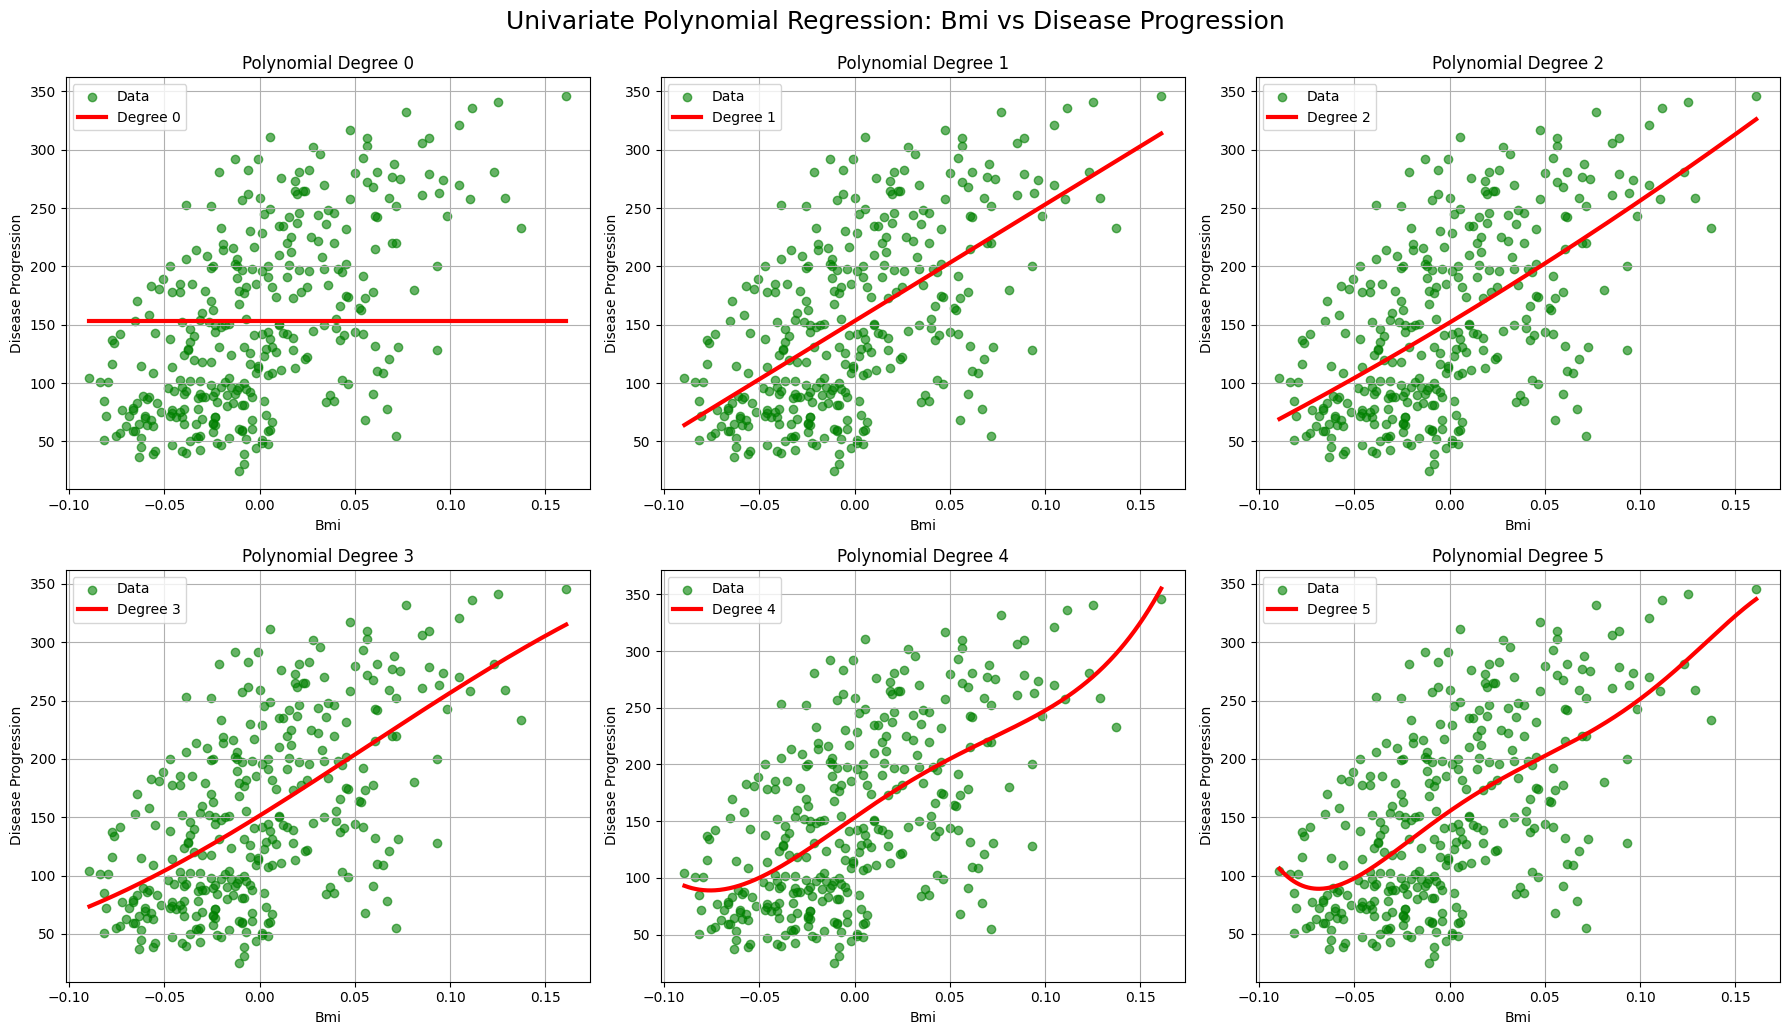

In [506]:
# Use with bmi feature
univariateRegressor = UnivariatePolynomialRegressor(X_train, y_train, feature='bmi')
univariateRegressor.fit_and_plot()

### 7. Compare the models

In [507]:
results_df = univariateRegressor.evaluate_models(X_val, y_val)
results_df

,Model,Train R²,Validation R²,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,model_deg_0,0.000000,-0.000011,66.548209,63.447475,0.633521,0.587933
1,model_deg_1,0.354240,0.449292,52.278064,41.997581,0.484624,0.404450
2,model_deg_2,0.354771,0.449158,52.267273,41.757683,0.484479,0.403099
3,model_deg_3,0.355002,0.447291,52.223375,41.741042,0.483564,0.402590
4,model_deg_4,0.357983,0.449064,51.944372,41.952846,0.479635,0.402406
5,model_deg_5,0.358910,0.453513,51.813830,42.083400,0.478315,0.403405


### 8. Identify the best model

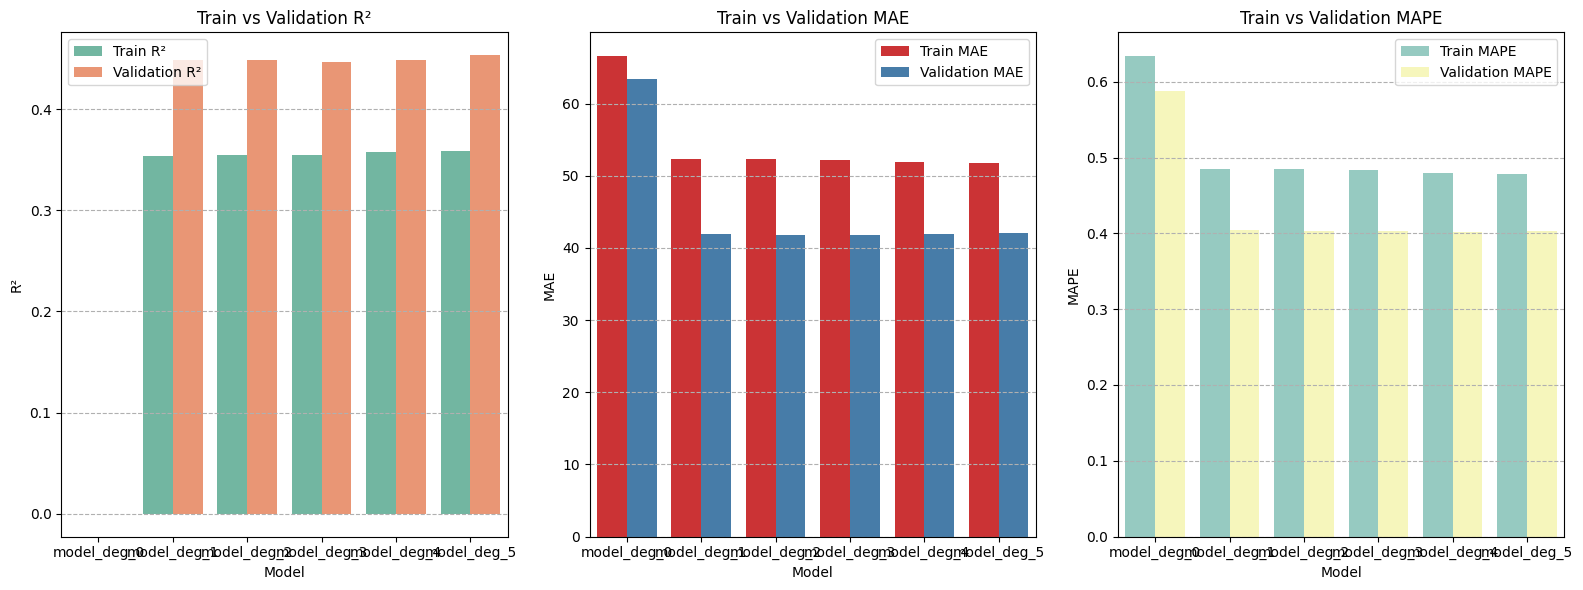

In [508]:
# Melt data for R² plot
r2_df = results_df.melt(id_vars='Model', value_vars=['Train R²', 'Validation R²'], var_name='Dataset', value_name='R²')

# Melt data for MAE plot
mae_df = results_df.melt(id_vars='Model', value_vars=['Train MAE', 'Validation MAE'], var_name='Dataset', value_name='MAE')

# Melt data for MAPE plot
mape_df = results_df.melt(id_vars='Model', value_vars=['Train MAPE', 'Validation MAPE'], var_name='Dataset', value_name='MAPE')
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# R² Plot
sns.barplot(data=r2_df, x='Model', y='R²', hue='Dataset', ax=axes[0], palette='Set2')
axes[0].set_title('Train vs Validation R²')
axes[0].grid(axis='y', linestyle='--')
axes[0].legend(title='')

# MAE Plot
sns.barplot(data=mae_df, x='Model', y='MAE', hue='Dataset', ax=axes[1], palette='Set1')
axes[1].set_title('Train vs Validation MAE')
axes[1].grid(axis='y', linestyle='--')
axes[1].legend(title='')

sns.barplot(data=mape_df, x='Model', y='MAPE', hue='Dataset', ax=axes[2], palette='Set3')
axes[2].set_title('Train vs Validation MAPE')
axes[2].grid(axis='y', linestyle='--')
axes[2].legend(title='')

plt.tight_layout()
plt.show()

The best model is Polynomial Degree 4. Because higher R² is better, and lower MAE and MAPE is better. Polynomial Degree 5 has better metrics for trained data but Polynomial Degree 4 has better metrics for validation data set.

In [509]:
models_uni_polynomial = univariateRegressor.get_models()
_, model_uni_best, poly_uni_best  = models_uni_polynomial[4]

### 9. Run the chosen model on the test set 

In [510]:
univariateRegressor.evaluate_model(4, X_test, y_test)

Degree 4 Polynomial Regression on Test Set:
R²:   0.1698
MAE:  55.0090
MAPE: 0.4815


### 10. Plot the train, validation and test data points with the best model

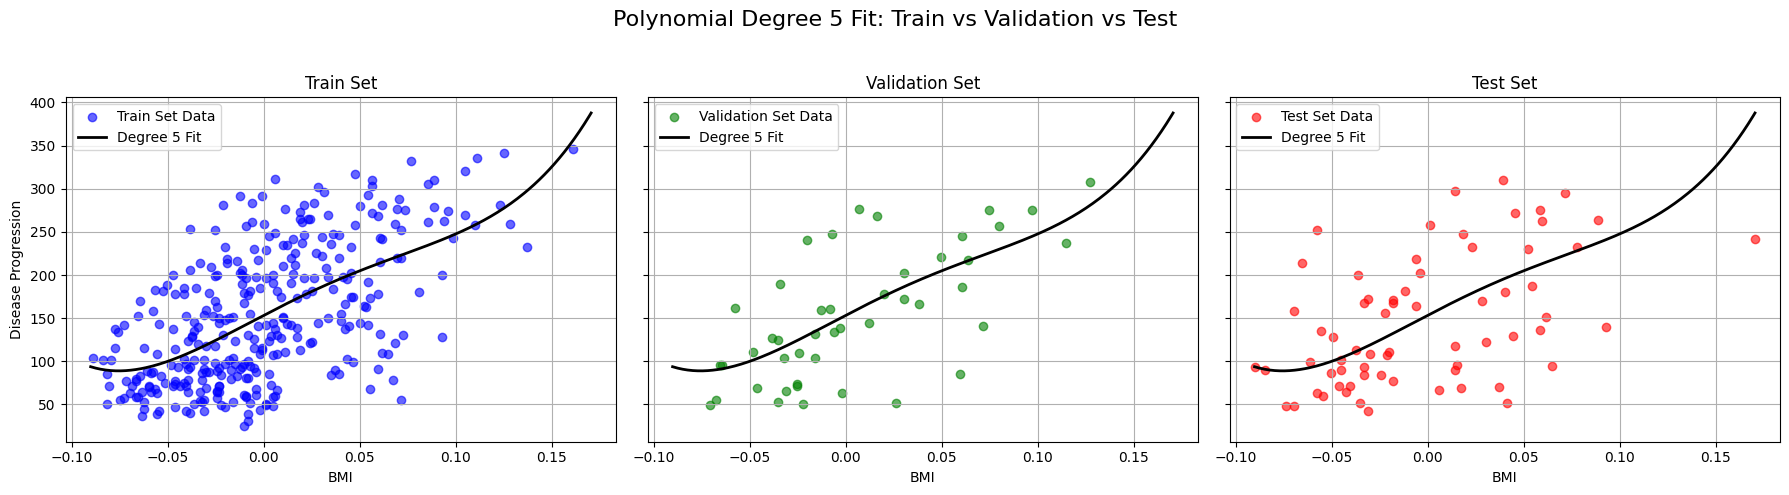

In [511]:
# Create a range of BMI values for a smooth curve
bmi_range = pd.DataFrame(np.linspace(df.bmi.min(), df.bmi.max(), 300).reshape(-1, 1), columns=['bmi'])
bmi_range_poly = poly_uni_best.transform(bmi_range)
y_range_pred = model_uni_best.predict(bmi_range_poly)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Data and titles for each set
datasets = [
    ("Train Set", X_train, y_train, 'blue'),
    ("Validation Set", X_val, y_val, 'green'),
    ("Test Set", X_test, y_test, 'red')
]

# Loop over axes and datasets
for i, (title, X_set, y_set, color) in enumerate(datasets):
    axes[i].scatter(X_set[['bmi']], y_set, color=color, label=f'{title} Data', alpha=0.6)
    axes[i].plot(bmi_range, y_range_pred, color='black', linewidth=2, label='Degree 5 Fit')
    axes[i].set_title(title)
    axes[i].set_xlabel('BMI')
    if i == 0:
        axes[i].set_ylabel('Disease Progression')
    axes[i].grid(True)
    axes[i].legend()

# Final layout adjustments
plt.suptitle('Polynomial Degree 5 Fit: Train vs Validation vs Test', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 11. Equation of the best model 

In [512]:
univariateRegressor.equation(4)

Polynomial Regression Equation (Degree 4):
y = 153.3805 + 1157.1735·bmi + -1200.8916·bmi^2 + -43541.3547·bmi^3 + 340316.8096·bmi^4


### 12. Prediction

In [513]:
# Calculate the expected diabetes progression for a bmi
bmi_value = 0.022

univariateRegressor.predict(4, bmi_value)

Predicted disease progression for bmi 0.022: 177.87


### 13. Trainable parameters

In [514]:
univariateRegressor.parameters()

,Model,Features
0,model_deg_0,[1]
1,model_deg_1,"[1, bmi]"
2,model_deg_2,"[1, bmi, bmi^2]"
3,model_deg_3,"[1, bmi, bmi^2, bmi^3]"
4,model_deg_4,"[1, bmi, bmi^2, bmi^3, bmi^4]"
5,model_deg_5,"[1, bmi, bmi^2, bmi^3, bmi^4, bmi^5]"


The feature name vector represents the polynomial features created from a single input value (bmi) for use in polynomial regression.

### 14. Conclusion 

Univariate polynomial regression works for only one independent variable, in our case, BMI, which makes it simple and interpretable. But in common sense, BMI is just one of the factors that affects the progress of diabete. Therefore, univariate polynomial regression won't be able to make correct predition just based BMI in our case.

## Part 3
### Multivariate Polynomial models

In [563]:
# A class to fit and evaluate multivariate polynomial regression.
class MultivariatePolynomialRegressor:
    def __init__(self, X, y, features, degrees=[1,2]):
        self.features = features
        self.X = X[features]
        self.y = y
        self.degrees = degrees
        self.models = []

    def fit(self):
        for degree in self.degrees:
            poly = PolynomialFeatures(degree)
            X_poly = poly.fit_transform(self.X)

            model = LinearRegression()
            model.fit(X_poly, self.y)

            self.models.append((f"model_deg_{degree}", model, poly))

    def evaluate_models(self, X_val, y_val):
        results = []
        for name, model, poly in self.models:
                X_train_poly = poly.transform(self.X)
                X_val_poly = poly.transform(X_val[self.features])

                y_train_pred = model.predict(X_train_poly)
                y_val_pred = model.predict(X_val_poly)

                results.append({
                    "Model": name,
                    'Train R²': r2_score(self.y, y_train_pred),
                    'Validation R²': r2_score(y_val, y_val_pred),
                    'Train MAE': mean_absolute_error(self.y, y_train_pred),
                    'Validation MAE': mean_absolute_error(y_val, y_val_pred),
                    'Train MAPE': mean_absolute_percentage_error(self.y, y_train_pred),
                    'Validation MAPE': mean_absolute_percentage_error(y_val, y_val_pred),
                })

        return pd.DataFrame(results)
    
    def evaluate_model(self, degree, X_test, y_test):
        _, model_deg, poly_deg = self.models[degree]
        # Transform the BMI feature in the test set
        X_test_poly_deg = poly_deg.transform(X_test[self.features]) 

        # Predict the target (disease progression) using the model
        y_pred_deg = model_deg.predict(X_test_poly_deg)

        r2 = r2_score(y_test, y_pred_deg)
        mae = mean_absolute_error(y_test, y_pred_deg)
        mape = mean_absolute_percentage_error(y_test, y_pred_deg)

        print(f"Degree {degree} Polynomial Regression on Test Set:")
        print(f"R²:   {r2:.4f}")
        print(f"MAE:  {mae:.4f}")
        print(f"MAPE: {mape:.4f}")

    def equation(self, degree):
        _, model_multi_best, poly_multi_best = self.models[degree]
         # Get feature names created by PolynomialFeatures
        feature_names = poly_multi_best.get_feature_names_out(self.features)

        # Get model coefficients
        coefs = model_multi_best.coef_
        intercept = model_multi_best.intercept_

        # Build equation string
        equation = f"y = {intercept:.4f}"
        for coef, name in zip(coefs[1:], feature_names[1:]):
            equation += f" + ({coef:.4f} * {name})"

        print(equation)

    def predict(self, degree, input_values):
        _, model, poly_transformer = self.models[degree]

        # Ensure the input includes all required features
        if not all(f in input_values for f in self.features):
            raise ValueError(f"Missing one or more required features: {self.features}")

        # Create DataFrame with one row
        input_df = pd.DataFrame([input_values])[self.features]

        # Transform the input with the polynomial transformer
        input_poly = poly_transformer.transform(input_df)

        # Make the prediction
        prediction = model.predict(input_poly)

        print(f"Predicted disease progression: {prediction[0]:.2f}")

    def parameters(self):
        # trainable parameters fitting for each of the models
        parameters = []

        for name, _, poly in self.models:
            # Get feature names from PolynomialFeatures
            feature_names = poly.get_feature_names_out(self.features)
            parameters.append({
                'Model': name,
                'Features': feature_names
            })
        # Convert to DataFrame
        return pd.DataFrame(parameters)

**Train the model**

In [564]:
# Use with all features
multivariateRegressor = MultivariatePolynomialRegressor(X_train, y_train, features=diabetes.feature_names, degrees=[1,2])
multivariateRegressor.fit()

**Compare the models using the training and validation data**

In [565]:
results_df = multivariateRegressor.evaluate_models(X_val, y_val)
results_df

,Model,Train R²,Validation R²,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,model_deg_1,0.518112,0.622619,44.208829,36.191317,0.393589,0.378042
1,model_deg_2,0.598109,0.602991,39.697470,37.745257,0.349386,0.410976


**Identify the best model**

The best model is Polynomial Degree 1. Comparing with Degree 2, Polynomial Degree 1 has higher R2 , and lower MAE and MAPE for validation dataset.

**Run the chosen model on the test set**

In [566]:
multivariateRegressor.evaluate_model(0, X_test, y_test)

Degree 0 Polynomial Regression on Test Set:
R²:   0.4140
MAE:  44.6630
MAPE: 0.3836


**Equation of the best model**

In [567]:
multivariateRegressor.equation(0)

y = 152.1292 + (60.8039 * age) + (-246.8194 * sex) + (543.8283 * bmi) + (352.6263 * bp) + (-1100.7851 * s1) + (701.0388 * s2) + (202.5440 * s3) + (197.3999 * s4) + (806.0303 * s5) + (39.2674 * s6)


**Prediction**

In [ ]:
# Calculate the expected diabetes progression
input_values = {'age': 50.5, 'sex':0.05068011873981862,  'bmi': 0.05, 'bp': 0.03, 's1':0.04559945128264711,'s2':-6.128357906057276e-05,'s3':-0.01394774321932938,'s4':-0.002592261998183278,'s5':-0.06291687914365544,'s6':-0.092204049626824}
multivariateRegressor.predict(0, input_values)

Predicted disease progression: 3140.08


**Trainable parameters**

In [569]:
multivariateRegressor.parameters()

,Model,Features
0,model_deg_1,"[1, age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]"
1,model_deg_2,"[1, age, sex, bmi, bp, s1, s2, s3, s4, s5, s6,..."


The feature name vector represents the polynomial features created from all the featuresw for use in polynomial regression.

**Conclusion**

Multivariate Polynomial models are for two or more independent variables. It is more powerful and flexible than Univariate Polynomial Regression. However, it tends to overfitting and hard to interpret.

### Decision Trees

In [570]:
from sklearn.tree import DecisionTreeRegressor

# A class to fit and evaluate decision tree regression.
class TreeRegressor:
    def __init__(self, X, y, features, depths=[2, 3]):
        self.X = X[features]
        self.y = y
        self.features = features
        self.depths = depths
        self.models = []

    def fit(self):
        for depth in self.depths:
            model = DecisionTreeRegressor(max_depth=depth)
            model.fit(self.X, self.y)
            self.models.append((f"model_depth_{depth}", model))

    def evaluate_models(self, X_val, y_val):
        results = []
        for name, model in self.models:
            # Train predictions
            y_train_pred = model.predict(self.X[self.features])
            y_val_pred = model.predict(X_val[self.features])

            results.append({
                'Model': name,
                'Train R²': r2_score(self.y, y_train_pred),
                'Validation R²': r2_score(y_val, y_val_pred),
                'Train MAE': mean_absolute_error(self.y, y_train_pred),
                'Validation MAE': mean_absolute_error(y_val, y_val_pred),
                'Train MAPE': mean_absolute_percentage_error(self.y, y_train_pred),
                'Validation MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
            })

        return pd.DataFrame(results)
    
    def evaluate_model(self, depth_index, X_test, y_test):
        name, model_deg = self.models[depth_index]

        # Predict the target (disease progression) using the model
        y_pred_deg = model_deg.predict(X_test[self.features])

        r2 = r2_score(y_test, y_pred_deg)
        mae = mean_absolute_error(y_test, y_pred_deg)
        mape = mean_absolute_percentage_error(y_test, y_pred_deg)

        print(f"{name} Decision Tree on Test Set:")
        print(f"R²:   {r2:.4f}")
        print(f"MAE:  {mae:.4f}")
        print(f"MAPE: {mape:.4f}")

    def predict(self, X_input, depth_index=0):
        # Create DataFrame with one row
        input_df = pd.DataFrame([X_input])[self.features]

        model_name, model = self.models[depth_index]
        prediction = model.predict(input_df)
        print(f"Predicted disease progression: {prediction[0]:.2f}")
    
    def get_models(self):
        return self.models

**Train the model**

In [571]:
# Use with all features
tree_model = TreeRegressor(X_train, y_train, features=diabetes.feature_names)
tree_model.fit()

**Compare the models using the training and validation data**

In [572]:
results_df = tree_model.evaluate_models(X_val, y_val)
results_df

,Model,Train R²,Validation R²,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,model_depth_2,0.443140,0.461533,47.730139,41.216410,0.423001,0.396515
1,model_depth_3,0.532987,0.412751,43.588017,42.077532,0.377478,0.436514


**Identify the best model**

The best model is Decision Tree with depth 2. Comparing with depth 3, Decision Tree with depth 2 has higher R2 , and lower MAE and MAPE for validation dataset.

**Run the chosen model on the test set**

In [573]:
tree_model.evaluate_model(0, X_test, y_test)

model_depth_2 Decision Tree on Test Set:
R²:   0.2674
MAE:  50.6043
MAPE: 0.4670


**Equation of the best model**

Decision Tree models do not produce a mathematical equation. They work by splitting the input feature space into regions and assigning a prediction value.

**Prediction**

In [ ]:
# Calculate the expected diabetes progression
input_values = {'age': 50.5, 'sex':0.05068011873981862,  'bmi': 0.05, 'bp': 0.03, 's1':0.04559945128264711,'s2':-6.128357906057276e-05,'s3':-0.01394774321932938,'s4':-0.002592261998183278,'s5':-0.06291687914365544,'s6':-0.092204049626824}
tree_model.predict(input_values, depth_index=0)

Predicted disease progression: 196.93


**Trainable parameters**

Decision Tree Regressor does not have "trainable parameters" like weights. Instead, it learns Split conditions, Leaf outputs and Tree structure.

In [576]:
# Show what the best model learns
_, tree_model_best = tree_model.get_models()[0]
tree = tree_model_best.tree_

print(f"Number of nodes: {tree.node_count}")
print(f"Number of features used: {tree.n_features}")
print(f"Maximum depth of the tree: {tree.max_depth}")

Number of nodes: 7
Number of features used: 10
Maximum depth of the tree: 2


**Conclusion**


Decision trees work with multiple features, and can model highly nonlinear patterns. They also tend to overfit when tree depth is bigger. Interpretability is very good becuase decision rules or tree structure can be visualized.

### kNNs

In [608]:
from sklearn.neighbors import KNeighborsRegressor
# A class to fit and evaluate KNN regression.
class KNNRegressor:
    def __init__(self, X, y, n_neighbors):
        self.X = X
        self.y = y
        self.n_neighbors = n_neighbors
        self.model = None

    def fit(self):
        self.model = KNeighborsRegressor(n_neighbors=self.n_neighbors)
        self.model.fit(self.X, self.y)

    def evaluate_model(self, X_val, y_val):
        y_train_pred = self.model.predict(self.X)
        y_val_pred = self.model.predict(X_val)

        results = {
            'Model': f"KNN (k={self.n_neighbors})",
            'Train R²': r2_score(self.y, y_train_pred),
            'Validation R²': r2_score(y_val, y_val_pred),
            'Train MAE': mean_absolute_error(self.y, y_train_pred),
            'Validation MAE': mean_absolute_error(y_val, y_val_pred),
            'Train MAPE': mean_absolute_percentage_error(self.y, y_train_pred),
            'Validation MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
            }
        return results

    def evaluate(self, X_test, y_test):
            y_pred = self.model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mape = mean_absolute_percentage_error(y_test, y_pred)

            print(f"KNN (k={self.n_neighbors}) on Test Set:")
            print(f"R²:   {r2:.4f}")
            print(f"MAE:  {mae:.4f}")
            print(f"MAPE: {mape:.4f}")

    def predict(self, X_input):
        # Create DataFrame with one row
        input_df = pd.DataFrame([X_input])
        prediction = self.model.predict(input_df)
        print(f"Predicted disease progression: {prediction[0]:.2f}")
        
    def get_model(self):
        return self.model


**Train and compare the models using the training and validation data****

In [609]:
# Train and evaluate KNN models with neighbor values 3 and 5
results = []
models = []

for k in [5, 8]:
    model = KNNRegressor(X_train, y_train, n_neighbors=k)
    model.fit()
    models.append(model)
    eval_result = model.evaluate_model(X_val, y_val)
    results.append(eval_result)

# Convert to DataFrame for display
results_df = pd.DataFrame(results)
results_df

,Model,Train R²,Validation R²,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,KNN (k=5),0.576691,0.485098,39.904848,43.395556,0.344201,0.428898
1,KNN (k=8),0.524205,0.437419,42.321591,45.469444,0.368662,0.463721


**Identify the best model**

KNN k=5 is the best model. It has higher R2, and lower MAE and MAPE for both training and validation dataset.

**Run the chosen model on the test set**

In [610]:
knn_5 = models[0]
knn_5.evaluate(X_test, y_test)

KNN (k=5) on Test Set:
R²:   0.4235
MAE:  43.8866
MAPE: 0.3774


**Equation of the best model**

k-Nearest Neighbors (kNN) regression does not produce a mathematical equation.

**Prediction**

In [611]:
# Calculate the expected diabetes progression
input_values = {'age': 50.5, 'sex':0.05068011873981862,  'bmi': 0.05, 'bp': 0.03, 's1':0.04559945128264711,'s2':-6.128357906057276e-05,'s3':-0.01394774321932938,'s4':-0.002592261998183278,'s5':-0.06291687914365544,'s6':-0.092204049626824}
knn_5.predict(input_values)

Predicted disease progression: 159.00


**Trainable parameters**

k-Nearest Neighbors (kNN) is typically considered a non-parametric model and does not have "trainable parameters" like parametric model. Instead, it has hyperparameters like n_neighbors, weights, metric and etc.

In [613]:
knn_5.get_model().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Conclusion**

KNN is simple to implement and make no assumption about the data distribution. It predicts by finding the nearest neighbors. When dataset is large or number of neighbors to use is big, it will be slow.